# STEPS
1. Import lIBRARIES
2. Import the Dataset
3. Perform the Data Analysis(DM, DC, DE, DV, EDA)
4. dATA pREPROCESSING- Feature Engineering(Encoders, Scaling, Feature Importance/Selection, Hyper Parameter Tuning, etc.)
5. Splitting of Data into sets - CV
6. mODEL sELECTION
7. Train the model
8. Test the model
9. Performance metric - Confusion matrix, accuracy_score

* Import Libraries

*pandas-profiling for graphs---click and drop, it generates reports refer it

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

* Importing the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/03.04.2024/creditcard.csv')

In [ ]:
df.head()
#its a highly imbalanced dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Data Analysis

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#Target variable-->'Class'

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# class 0--> more data
#class1--> very less

In [ ]:
#imbalanced data, 00000000000000000001111111

<Axes: >

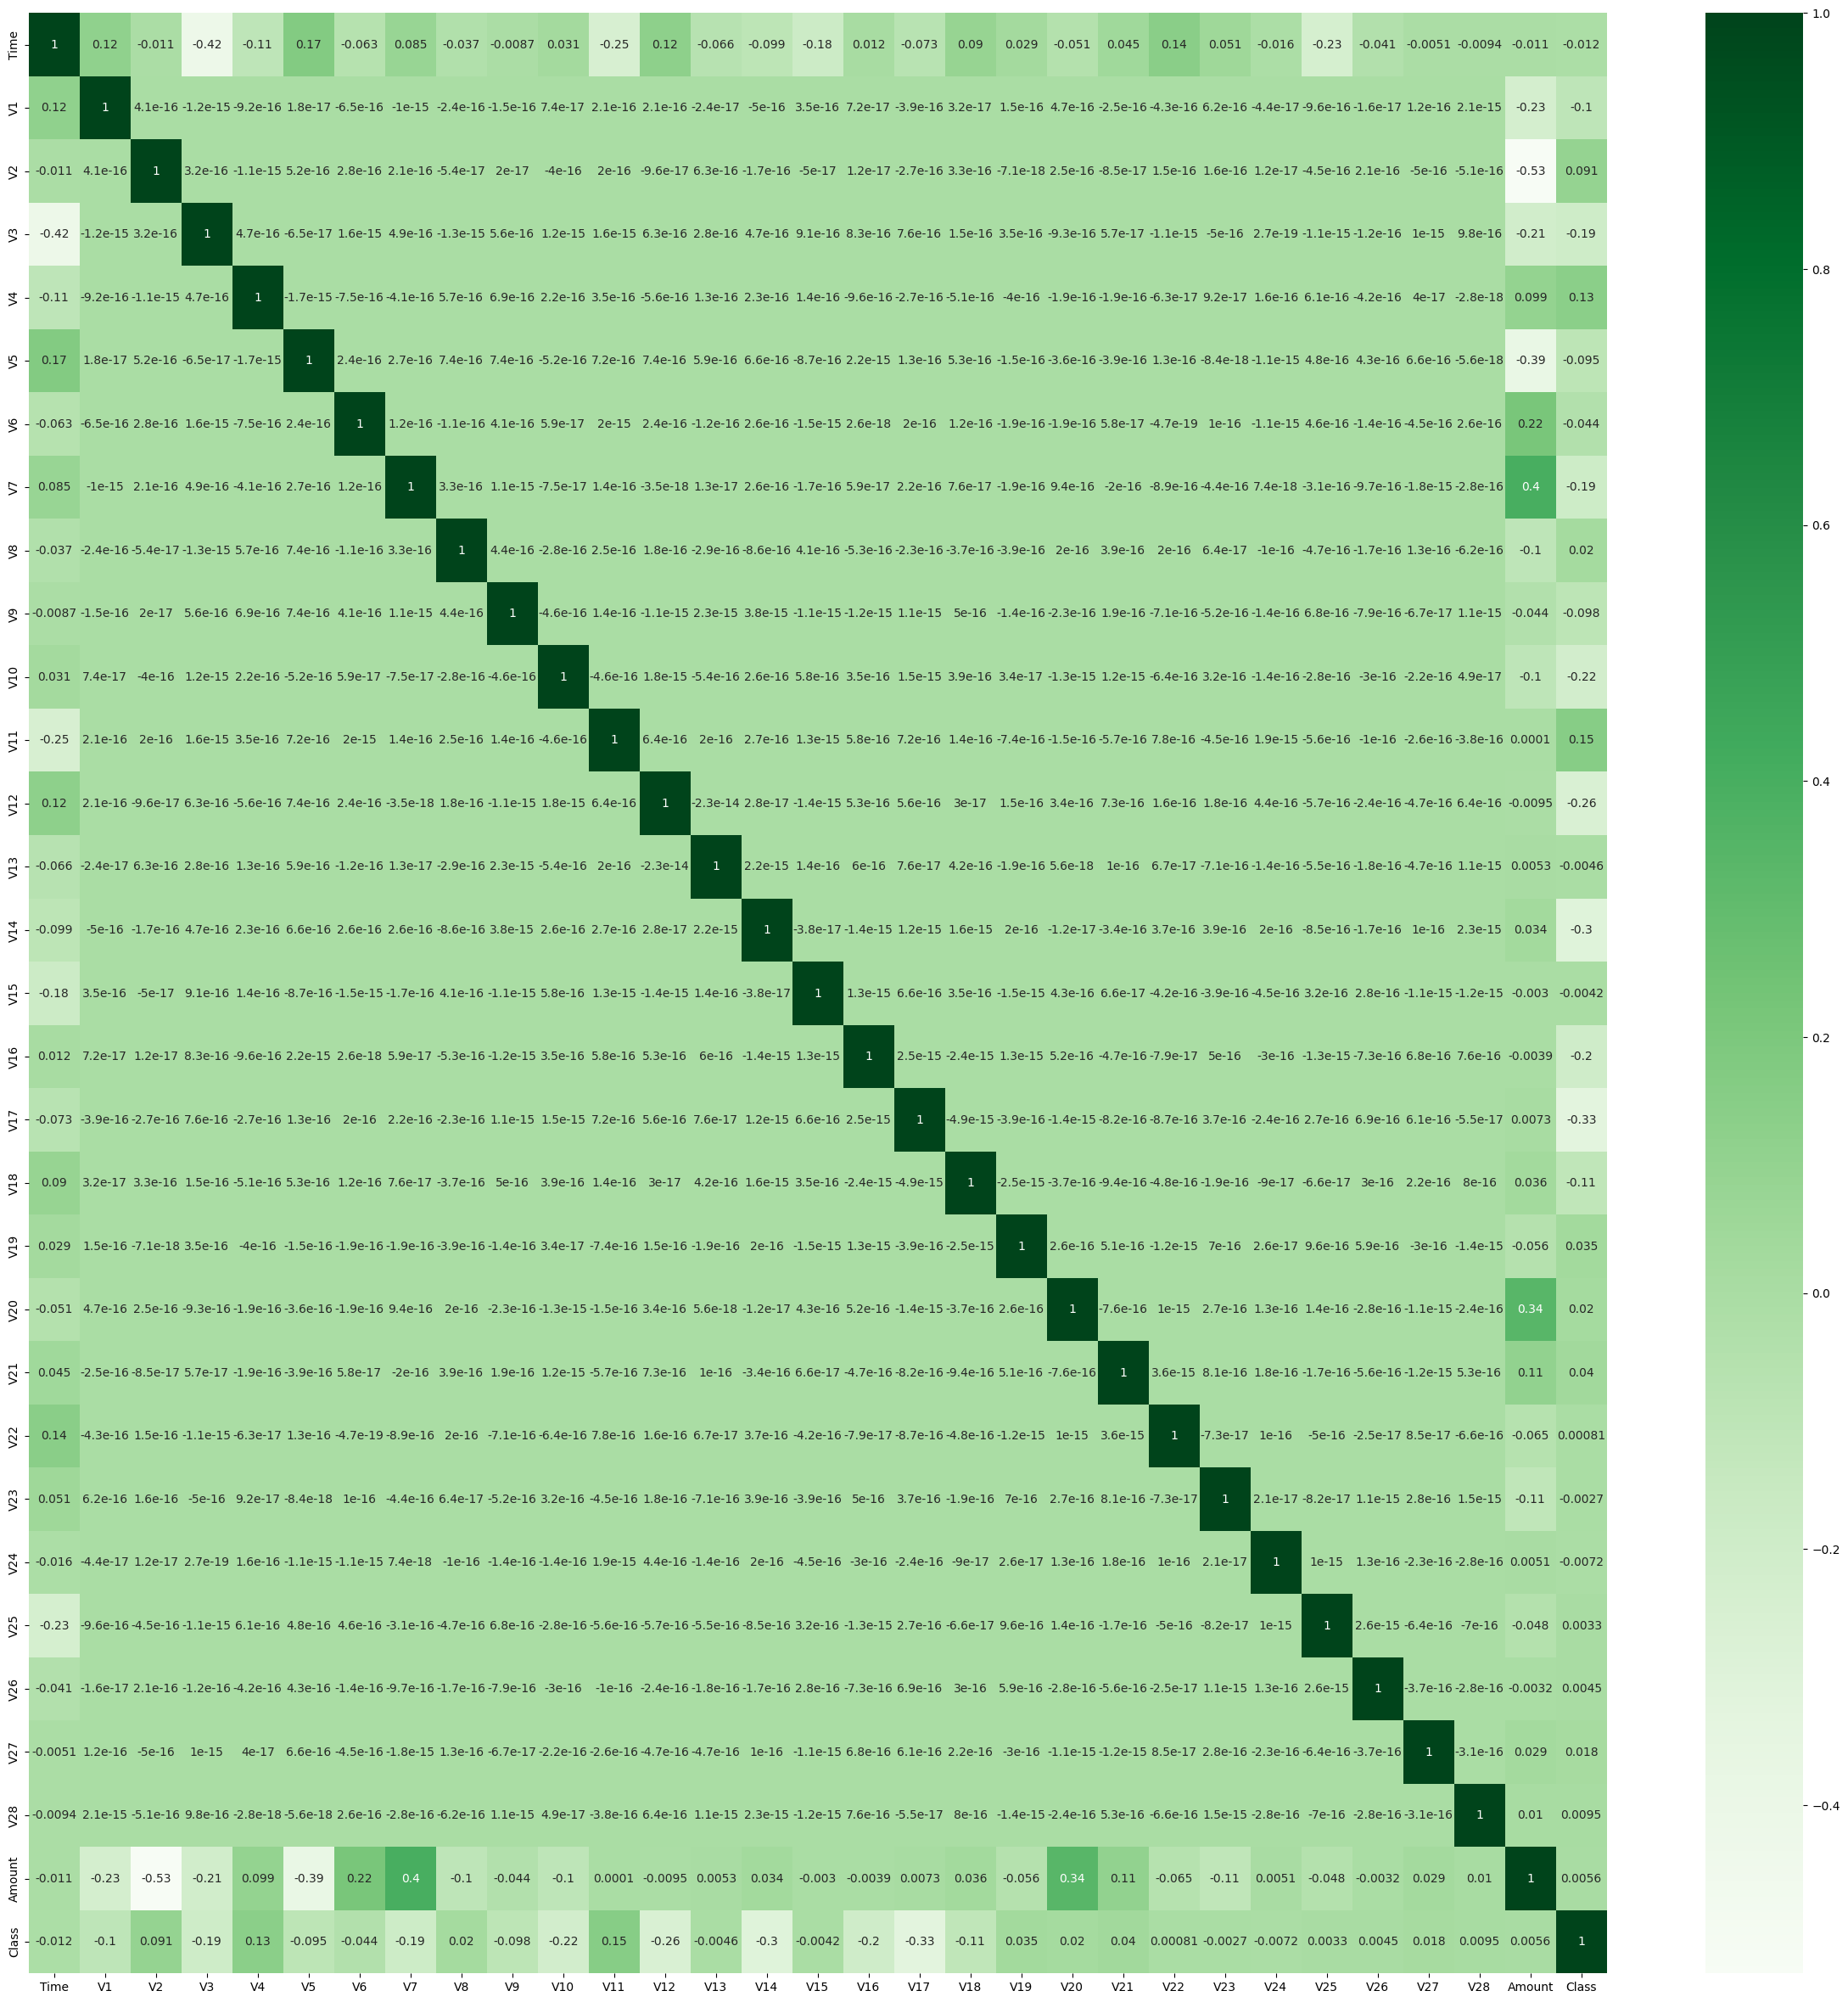

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [ ]:
#Time has very less effect on target

* Handling Imbalanced Data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
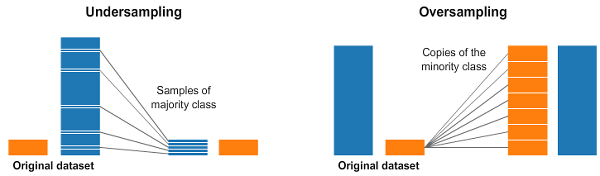

In [ ]:
# 3 ways to handle imbalanced dataset
# Random under-sampling
# Random over-sampling
# NearMiss

In [ ]:
#1. Random Under-Sampling
# class_0_under = class_0.sample(class_count_1)

# test_under = pd.concat([class_0_under, class_1], axis=0)

# print("total class of 1 and0:",test_under['Class'].value_counts())# plot the count after under-sampeling
# test_under['Class'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# 2. Random Over-Sampling
# class_1_over = class_1.sample(class_count_0, replace=True)

# test_over = pd.concat([class_1_over, class_0], axis=0)

# print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
# test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# import imblearn
# # import library
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
# x_rus, y_rus = rus.fit_resample(x, y)

# print('original dataset shape:', Counter(y))
# print('Resample dataset shape', Counter(y_rus))

In [ ]:
#################################################

In [ ]:
#Mostly we'll cover how to handle imbalanced dataset

In [ ]:
#################################################

In [ ]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#to find which features has more importance
model=ExtraTreesClassifier()

In [ ]:
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.01793932, 0.01186181, 0.01400333, 0.03026486, 0.03939928,
       0.01402511, 0.01247265, 0.02487397, 0.01318239, 0.03184238,
       0.06616042, 0.08012177, 0.10538793, 0.01326488, 0.12217742,
       0.01162381, 0.06960131, 0.14205715, 0.03983696, 0.01433493,
       0.01381605, 0.01681029, 0.01212991, 0.00954589, 0.01169459,
       0.01076212, 0.01431129, 0.01234443, 0.01296257, 0.0111912 ])

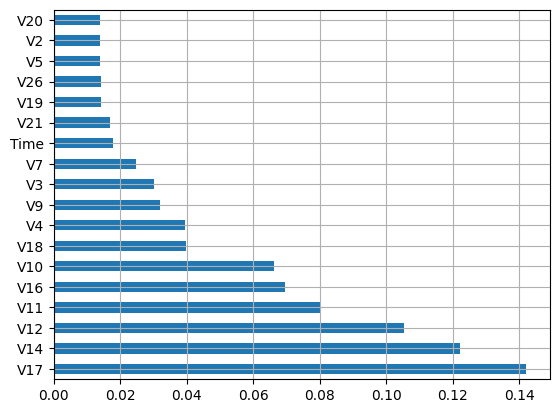

In [ ]:
# find top n20 important features
feat = pd.Series( model.feature_importances_, index=X.columns)
feat.nlargest(18).plot(kind='barh')
plt.grid()

In [ ]:
feat.nlargest(18)

V17     0.142057
V14     0.122177
V12     0.105388
V11     0.080122
V16     0.069601
V10     0.066160
V18     0.039837
V4      0.039399
V9      0.031842
V3      0.030265
V7      0.024874
Time    0.017939
V21     0.016810
V19     0.014335
V26     0.014311
V5      0.014025
V2      0.014003
V20     0.013816
dtype: float64

# Lets play
            28 features
            =         =
          =             =
        =                 =
      Take all 28      do featiure selection
      and train         take only 18
                         features and train
Scenario A
Scenario B

Lets see which khas more accuracy--(i)

Lets see if feature selection is necessary or not---(ii)

In [ ]:
#Scenario B
#TAKE THOSE 18 FEATURES AND STORE
# X_new=X[?,?,?,?,]
SELECTED= feat.nlargest(18)

In [ ]:
SELECTED.index

Index(['V17', 'V14', 'V12', 'V11', 'V16', 'V10', 'V18', 'V4', 'V9', 'V3', 'V7',
       'Time', 'V21', 'V19', 'V26', 'V5', 'V2', 'V20'],
      dtype='object')

In [ ]:
X_new=X[['V17', 'V12', 'V14', 'V11', 'V16', 'V10', 'V18', 'V4', 'V3', 'V9', 'V7',
       'Time', 'V21', 'V2', 'V19', 'V8', 'V26', 'V1']]

In [ ]:
X_new.head(1)

,V17,V12,V14,V11,V16,V10,V18,V4,V3,V9,V7,Time,V21,V2,V19,V8,V26,V1
0,0.207971,-0.617801,-0.311169,-0.5516,-0.470401,0.090794,0.025791,1.378155,2.536347,0.363787,0.239599,0.0,-0.018307,-0.072781,0.403993,0.098698,-0.189115,-1.359807


In [ ]:
#Scenario A
X.shape

(284807, 30)

In [ ]:
#Scenario B
X_new.shape

(284807, 18)

* Splitting data into sets

In [ ]:
#StratifirdKFold

In [ ]:
skf=StratifiedKFold(n_splits=10)

In [ ]:
#Scenario A
for train_index, test_index in skf.split(X,y):
  X_train, X_test= X.iloc[train_index], X.iloc[test_index]
  y_train, y_test= y.iloc[train_index], y.iloc[test_index]



In [ ]:
#Scenario B
for train_index, test_index in skf.split(X,y):
  X_new_train, X_new_test= X_new.iloc[train_index], X_new.iloc[test_index]
  y_new_train, y_new_test= y.iloc[train_index], y.iloc[test_index]



In [ ]:
X_train.shape

(256327, 30)

In [ ]:
X_new_train.shape

(256327, 18)

* Choose a model

In [ ]:
decision= DecisionTreeClassifier()
randomf= RandomForestClassifier()

* Hyper parameter tuning for RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
n_estimators=[int(i) for i in np.linspace(100,2000,12)]
max_features = ['sqrt', 'log2']
max_depth = [int(i) for i in np.linspace(5,30,5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
parameters={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf

}

In [ ]:
parameters

{'n_estimators': [100,
  272,
  445,
  618,
  790,
  963,
  1136,
  1309,
  1481,
  1654,
  1827,
  2000],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [5, 11, 17, 23, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

* Train

In [ ]:
rf_model= RandomizedSearchCV(estimator= randomf, param_distributions= parameters, scoring='neg_mean_squared_error',
                             n_jobs=1,
                             cv=5,
                             verbose=2,
                             random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
#class count
class_0_count, class_1_count=df['Class'].value_counts()

In [ ]:
#rf_model.fit(X_new_train, y_new_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# # ###################################################################3
# # 1. UnderSampling
# #majority class->reducing
# rf_model

In [ ]:
# # ###################################################################3
# # 2. OverSampling
# #minority class->increasing
# rf_model

In [ ]:
y_pred= rf_model.predict()

#pypi
#imblearn
#imbalanced-learn
#lazypredict(automl for classification and regression): https://pypi.org/project/lazypredict/
#auto-sklearn: https://pypi.org/project/auto-sklearn/

In [ ]:
#automl using lazypredict

In [ ]:
!pip install lazypredict

In [ ]:
# from lazypredict.Supervised import LazyClassifier
#it needs pip install numpy==1.19.1 version

In [ ]:
# clf= LazyClassifier(verbose=0, ignore_warnings= True, custom_metric=None)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [03:30<1:38:18, 210.64s/it]


KeyboardInterrupt: 

In [ ]:
pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... canceled
ERROR: Operation cancelled by user
